In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
#spam .csv= This is dataset of mobile sms,we have all the messages over here and for each #messages, a category has been
# given so a message either a spam or a not spam

In [3]:
df = pd.read_csv("spam.csv", encoding='latin1')
df

,category,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,not spam,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,not spam,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,not spam,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,not spam,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,not spam,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,not spam,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,not spam,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.isnull().sum()/df.shape[0]*100

category       0.000000
message        0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

In [5]:
#to delete unwanted column
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [6]:
#now use first wordCloud
#call wordcloud; inbuilt class
from wordcloud import WordCloud,STOPWORDS

In [7]:
# Create an object of the WordCloud class
my_cloud = WordCloud(width=1000, height=1000, background_color="white",min_font_size=10)

In [8]:
my_cloud.generate(''.join(df[df['category']=='spam']['message']))

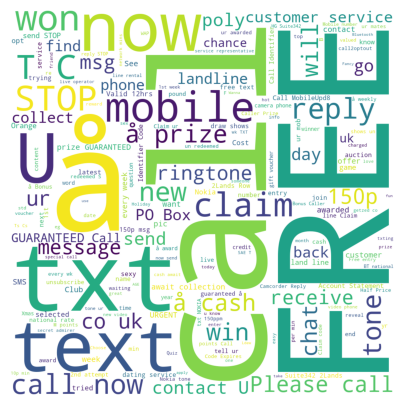

In [9]:
plt.figure(figsize=(5,5))
plt.imshow(my_cloud)
plt.axis('off')
plt.show()

In [10]:
# Create an object of the WordCloud class
my_cloud_notspam = WordCloud(width=1000, height=1000, background_color="white",min_font_size=10)
my_cloud_notspam.generate(''.join(df[df['category']=='not spam']['message']))

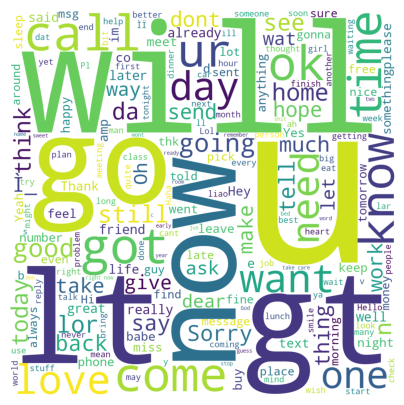

In [11]:
plt.figure(figsize=(5,5))
plt.imshow(my_cloud_notspam)
plt.axis('off')
plt.show()

In [12]:
#text preprocessing:-
#remove stopwords
#list of stopwords
stop=stopwords.words('english') #user define object

In [13]:
#user define function for preprocessing of text
def clean_text(text):           #here clean_text() is a user define passing argument function
    #converting lower case  and then tokenize it
    token=word_tokenize(text.lower())
    #filter only the alphabet use inbuilt functions isalpha() #remove number and special character from text
    word_token=[t for t in token if t.isalpha()] #word token user define list object
    #remove stopwords
    #use list comphrension
    print(token)
    print(word_token)
    clean_tokens=[t for t in word_token if t not in stop] 
    
    print(clean_tokens)
    #next step of preprocessing :Lemmanitzation
    
    #create object of WordnetLemmanitzater class
    lemma=WordNetLemmatizer()
    lemmatized_token=[lemma.lemmatize(t) for t in clean_tokens]
    return " ".join(lemmatized_token)

In [14]:
#we apply the same clean_text() on the entire column of Message of dataset
df['message']=df['message'].apply(clean_text) #passing the function in apply() inbuilt function
#df[message] is a parameter

['go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'there', 'got', 'amore', 'wat', '...']
['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
['ok', 'lar', '...', 'joking', 'wif', 'u', 'oni', '...']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005.', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'question', '(', 'std', 'txt', 'rate', ')', 't', '&', 'c', "'s", 'apply', '08452810075over18', "'s"]
['free', 'entry', 'in', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', 'may', 'tex

['good', 'find', 'way']
['can', 'not', 'use', 'foreign', 'stamps', 'in', 'this', 'country', '.', 'good', 'lecture', '.']
['can', 'not', 'use', 'foreign', 'stamps', 'in', 'this', 'country', 'good', 'lecture']
['use', 'foreign', 'stamps', 'country', 'good', 'lecture']
['yup', 'bathe', 'liao', '...']
['yup', 'bathe', 'liao']
['yup', 'bathe', 'liao']
['happy', 'new', 'year', 'my', 'no.1', 'man']
['happy', 'new', 'year', 'my', 'man']
['happy', 'new', 'year', 'man']
['oh', 'mr', 'sheffield', '!', 'you', 'wan', 'na', 'play', 'that', 'game', ',', 'okay', '.', 'you', "'re", 'the', 'boss', 'and', 'i', "'m", 'the', 'nanny', '.', 'you', 'give', 'me', 'a', 'raise', 'and', 'i', "'ll", 'give', 'you', 'one', '!', '!']
['oh', 'mr', 'sheffield', 'you', 'wan', 'na', 'play', 'that', 'game', 'okay', 'you', 'the', 'boss', 'and', 'i', 'the', 'nanny', 'you', 'give', 'me', 'a', 'raise', 'and', 'i', 'give', 'you', 'one']
['oh', 'mr', 'sheffield', 'wan', 'na', 'play', 'game', 'okay', 'boss', 'nanny', 'give', 'ra

['mmmm', '...', 'fuck', '...', 'not', 'fair', '!', 'you', 'know', 'my', 'weaknesses', '!', '*', 'grins', '*', '*', 'pushes', 'you', 'to', 'your', 'knee', "'s", '*', '*', 'exposes', 'my', 'belly', 'and', 'pulls', 'your', 'head', 'to', 'it', '*', 'do', "n't", 'forget', '...', 'i', 'know', 'yours', 'too', '*', 'wicked', 'smile', '*']
['mmmm', 'fuck', 'not', 'fair', 'you', 'know', 'my', 'weaknesses', 'grins', 'pushes', 'you', 'to', 'your', 'knee', 'exposes', 'my', 'belly', 'and', 'pulls', 'your', 'head', 'to', 'it', 'do', 'forget', 'i', 'know', 'yours', 'too', 'wicked', 'smile']
['mmmm', 'fuck', 'fair', 'know', 'weaknesses', 'grins', 'pushes', 'knee', 'exposes', 'belly', 'pulls', 'head', 'forget', 'know', 'wicked', 'smile']
['today', 'my', 'system', 'sh', 'get', 'ready.all', 'is', 'well', 'and', 'i', 'am', 'also', 'in', 'the', 'deep', 'well']
['today', 'my', 'system', 'sh', 'get', 'is', 'well', 'and', 'i', 'am', 'also', 'in', 'the', 'deep', 'well']
['today', 'system', 'sh', 'get', 'well', 

['i', 'do', "n't", 'know', 'u', 'and', 'u', 'do', "n't", 'know', 'me', '.', 'send', 'chat', 'to', '86688', 'now', 'and', 'let', "'s", 'find', 'each', 'other', '!', 'only', '150p/msg', 'rcvd', '.', 'hg/suite342/2lands/row/w1j6hl', 'ldn', '.', '18', 'years', 'or', 'over', '.']
['i', 'do', 'know', 'u', 'and', 'u', 'do', 'know', 'me', 'send', 'chat', 'to', 'now', 'and', 'let', 'find', 'each', 'other', 'only', 'rcvd', 'ldn', 'years', 'or', 'over']
['know', 'u', 'u', 'know', 'send', 'chat', 'let', 'find', 'rcvd', 'ldn', 'years']
['no', '*', 'am', 'working', 'on', 'the', 'ringing', 'u', 'thing', 'but', 'have', 'whole', 'houseful', 'of', 'screaming', 'brats', 'so', '*', 'am', 'pulling', 'my', 'hair', 'out', '!', 'loving', 'u']
['no', 'am', 'working', 'on', 'the', 'ringing', 'u', 'thing', 'but', 'have', 'whole', 'houseful', 'of', 'screaming', 'brats', 'so', 'am', 'pulling', 'my', 'hair', 'out', 'loving', 'u']
['working', 'ringing', 'u', 'thing', 'whole', 'houseful', 'screaming', 'brats', 'pulli

['aight', ',', 'let', 'me', 'know', 'when', 'you', "'re", 'gon', 'na', 'be', 'around', 'usf']
['aight', 'let', 'me', 'know', 'when', 'you', 'gon', 'na', 'be', 'around', 'usf']
['aight', 'let', 'know', 'gon', 'na', 'around', 'usf']
['i', "'m", 'not', '.', 'she', 'lip', 'synced', 'with', 'shangela', '.']
['i', 'not', 'she', 'lip', 'synced', 'with', 'shangela']
['lip', 'synced', 'shangela']
['ìï', 'neva', 'tell', 'me', 'how', 'i', 'noe', '...', 'i', "'m", 'not', 'at', 'home', 'in', 'da', 'aft', 'wat', '...']
['ìï', 'neva', 'tell', 'me', 'how', 'i', 'noe', 'i', 'not', 'at', 'home', 'in', 'da', 'aft', 'wat']
['ìï', 'neva', 'tell', 'noe', 'home', 'da', 'aft', 'wat']
['a', 'bit', 'of', 'ur', 'smile', 'is', 'my', 'hppnss', ',', 'a', 'drop', 'of', 'ur', 'tear', 'is', 'my', 'sorrow', ',', 'a', 'part', 'of', 'ur', 'heart', 'is', 'my', 'life', ',', 'a', 'heart', 'like', 'mine', 'wil', 'care', 'for', 'u', ',', 'forevr', 'as', 'my', 'goodfriend']
['a', 'bit', 'of', 'ur', 'smile', 'is', 'my', 'hppnss

['wewa', 'is', '130.', 'iriver', '255.', 'all', '128', 'mb', '.']
['wewa', 'is', 'iriver', 'all', 'mb']
['wewa', 'iriver', 'mb']
['it', 'is', 'a', 'good', 'thing', 'i', "'m", 'now', 'getting', 'the', 'connection', 'to', 'bw']
['it', 'is', 'a', 'good', 'thing', 'i', 'now', 'getting', 'the', 'connection', 'to', 'bw']
['good', 'thing', 'getting', 'connection', 'bw']
['sry', 'da', '..', 'jst', 'nw', 'only', 'i', 'came', 'to', 'home', '..']
['sry', 'da', 'jst', 'nw', 'only', 'i', 'came', 'to', 'home']
['sry', 'da', 'jst', 'nw', 'came', 'home']
['that', "'s", 'cool', 'he', "'ll", 'be', 'here', 'all', 'night', ',', 'lem', 'me', 'know', 'when', 'you', "'re", 'around']
['that', 'cool', 'he', 'be', 'here', 'all', 'night', 'lem', 'me', 'know', 'when', 'you', 'around']
['cool', 'night', 'lem', 'know', 'around']
['are', 'you', 'staying', 'in', 'town', '?']
['are', 'you', 'staying', 'in', 'town']
['staying', 'town']
['haha', 'yeah', ',', '2', 'oz', 'is', 'kind', 'of', 'a', 'shitload']
['haha', 'yeah

['sac', 'needs', 'to', 'carry', 'on', ':', ')']
['sac', 'needs', 'to', 'carry', 'on']
['sac', 'needs', 'carry']
['just', 'sing', 'hu', '.', 'i', 'think', 'its', 'also', 'important', 'to', 'find', 'someone', 'female', 'that', 'know', 'the', 'place', 'well', 'preferably', 'a', 'citizen', 'that', 'is', 'also', 'smart', 'to', 'help', 'you', 'navigate', 'through', '.', 'even', 'things', 'like', 'choosing', 'a', 'phone', 'plan', 'require', 'guidance', '.', 'when', 'in', 'doubt', 'ask', 'especially', 'girls', '.']
['just', 'sing', 'hu', 'i', 'think', 'its', 'also', 'important', 'to', 'find', 'someone', 'female', 'that', 'know', 'the', 'place', 'well', 'preferably', 'a', 'citizen', 'that', 'is', 'also', 'smart', 'to', 'help', 'you', 'navigate', 'through', 'even', 'things', 'like', 'choosing', 'a', 'phone', 'plan', 'require', 'guidance', 'when', 'in', 'doubt', 'ask', 'especially', 'girls']
['sing', 'hu', 'think', 'also', 'important', 'find', 'someone', 'female', 'know', 'place', 'well', 'prefer

In [15]:
df['message']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts may...
3                     u dun say early hor u c already say
4                     nah think go usf life around though
                              ...                        
5567    time tried contact u pound prize claim easy ca...
5568                            b going esplanade fr home
5569                                 pity mood suggestion
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: message, Length: 5572, dtype: object

In [16]:
df.head()

,category,message
0,not spam,go jurong point crazy available bugis n great ...
1,not spam,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts may...
3,not spam,u dun say early hor u c already say
4,not spam,nah think go usf life around though


In [17]:
X=df['message'] #input features
Y=df['category'] #output target variable which we want to predict

In [18]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
Y=lr.fit_transform(Y)


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [21]:
cv=CountVectorizer() #here not passing the stopwords='english' parameter why? #because it take care of all the stopwords
x_train_cv=cv.fit_transform(x_train) #70% data for training
x_test_cv=cv.transform(x_test)#30% testing data

In [22]:
# x_train_tf=tf.fit_transform(x_train) #70% data for training
# x_test_tf=tf.transform(x_test)#30% testing data

In [23]:
# pd.DataFrame(x_train_tf.toarray(),columns=tf.get_feature_names_out())

In [24]:
# pd.DataFrame(x_test_tf.toarray(),columns=tf.get_feature_names_out())

In [25]:
import tensorflow as tf

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [27]:
x_train_cv=x_train_cv.toarray()


In [28]:
x_test_cv=x_test_cv.toarray()

In [29]:
x_train_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
#create the object of sequential model
model=tf.keras.Sequential([
    #first hidden Layer
    tf.keras.layers.Dense(units=14,activation='relu',
                         input_shape=(x_train_cv.shape[1],)),
#      tf.keras.layers.Dense(units=14,activation='relu',
#                          input_shape=(x.shape[1],)),
    #output layer
    tf.keras.layers.Dense(units=1,activation='sigmoid')
    
])


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                77266     
                                                                 
 dense_1 (Dense)             (None, 1)                 15        
                                                                 
Total params: 77281 (301.88 KB)
Trainable params: 77281 (301.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
#compile the model
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
# create procedure to decide number of iterations or epochs
# first early stopping class
from tensorflow.keras.callbacks import EarlyStopping 
#create a object of early stopping class
cb=EarlyStopping(
    monitor="val_loss",# val loss validation loss means testing error (testing loss)  # if it is accuary it will stop at accuarcay
    min_delta=0.00001,  #delta min learning rate #lyma value of early stopping #fixing weight and bias
    patience=20, #not stoping immediately
    verbose=1,  #it show me where  the early stopping has taken place
    mode="auto",
    baseline=None, #nueral network decided automatic
    restore_best_weights=False #default true but false it will assign first weights(so False)

)

In [34]:
trained_model=model.fit(x_train_cv,y_train,epochs=5000,callbacks=cb,validation_data=(x_test_cv,y_test))

Epoch 1/5000


122/122 [==============================] - 2s 7ms/step - loss: 0.4956 - accuracy: 0.9015 - val_loss: 0.3191 - val_accuracy: 0.9539
Epoch 2/5000
122/122 [==============================] - 1s 5ms/step - loss: 0.2150 - accuracy: 0.9685 - val_loss: 0.1661 - val_accuracy: 0.9749
Epoch 3/5000
122/122 [==============================] - 0s 4ms/step - loss: 0.1068 - accuracy: 0.9856 - val_loss: 0.1145 - val_accuracy: 0.9749
Epoch 4/5000
122/122 [==============================] - 0s 4ms/step - loss: 0.0645 - accuracy: 0.9890 - val_loss: 0.0932 - val_accuracy: 0.9773
Epoch 5/5000
122/122 [==============================] - 0s 4ms/step - loss: 0.0436 - accuracy: 0.9931 - val_loss: 0.0830 - val_accuracy: 0.9797
Epoch 6/5000
122/122 [==============================] - 0s 4ms/step - loss: 0.0316 - accuracy: 0.9951 - val_loss: 0.0778 - val_accuracy: 0.9797
Epoch 7/5000
122/122 [==============================] - 0s 4ms/step - loss: 0.0241 - accuracy: 0.9962 - val_loss: 0.0749 - val_accurac

In [35]:
trained_model

In [36]:
print("print train_loss and Train_accuarcay",model.evaluate(x_train_cv,y_train))
print("print test_loss and Test_accuarcay",model.evaluate(x_test_cv,y_test))

122/122 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.9992
print train_loss and Train_accuarcay [0.0017727278172969818, 0.9992307424545288]
53/53 [==============================] - 0s 2ms/step - loss: 0.0982 - accuracy: 0.9785
print test_loss and Test_accuarcay [0.09822926670312881, 0.9784688949584961]


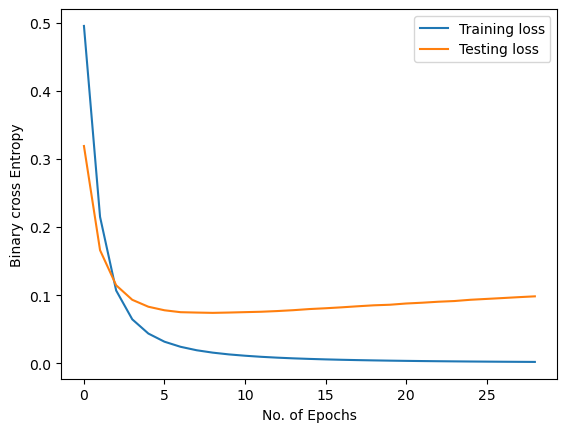

In [37]:
plt.plot(trained_model.history['loss'],label='Training loss')
plt.plot(trained_model.history['val_loss'],label='Testing loss')
plt.xlabel("No. of Epochs")
plt.ylabel('Binary cross Entropy')
plt.legend()
plt.show()

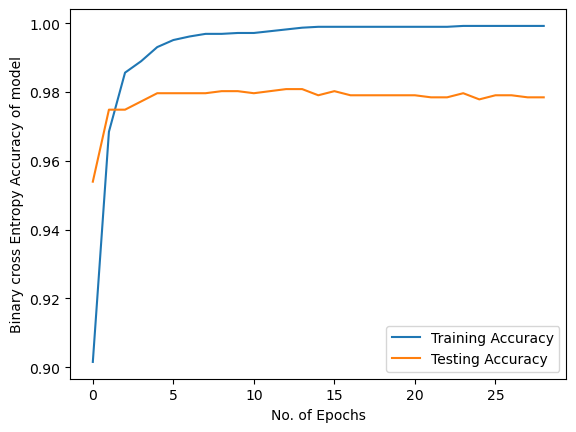

In [38]:
#visulisation of training and testing accuracy
plt.plot(trained_model.history['accuracy'],label='Training Accuracy')
plt.plot(trained_model.history['val_accuracy'],label='Testing Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel('Binary cross Entropy Accuracy of model')
plt.legend()
plt.show()

In [39]:
#test the model with 30% of data
y_pred=model.predict(x_test_cv).round(1)
y_pred
#formula for y_pred=np.exp(-x_test)/np.sum(np.exp(x_test))

53/53 [==============================] - 0s 2ms/step


array([[0. ],
       [0. ],
       [0. ],
       ...,
       [0.9],
       [0. ],
       [0. ]], dtype=float32)

In [40]:
y_pred=np.where(y_pred>=0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1454
           1       0.97      0.88      0.92       218

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [43]:
print(confusion_matrix(y_test,y_pred))

[[1449    5]
 [  27  191]]


In [44]:
#tf_idf training

In [45]:
tfidf = TfidfVectorizer()

In [46]:
x_train_tf=tfidf.fit_transform(x_train) #70% data for training
x_test_tf=tfidf.transform(x_test)#30% testing data

In [47]:
x_train_tf=x_train_tf.toarray()
x_test_tf=x_test_tf.toarray()


In [48]:
#create the object of sequential model
model1=tf.keras.Sequential([
    #first hidden Layer
    tf.keras.layers.Dense(units=14,activation='relu',
                         input_shape=(x_train_tf.shape[1],)),
#      tf.keras.layers.Dense(units=14,activation='relu',
#                          input_shape=(x.shape[1],)),
    #output layer
    tf.keras.layers.Dense(units=1,activation='sigmoid')
    
])

In [49]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 14)                77266     
                                                                 
 dense_3 (Dense)             (None, 1)                 15        
                                                                 
Total params: 77281 (301.88 KB)
Trainable params: 77281 (301.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
#compile the model
model1.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
trained_model1=model1.fit(x_train_tf,y_train,epochs=5000,callbacks=cb,validation_data=(x_test_tf,y_test))

Epoch 1/5000
122/122 [==============================] - 1s 6ms/step - loss: 0.5637 - accuracy: 0.8636 - val_loss: 0.4182 - val_accuracy: 0.8834
Epoch 2/5000
122/122 [==============================] - 0s 3ms/step - loss: 0.3203 - accuracy: 0.9077 - val_loss: 0.2375 - val_accuracy: 0.9420
Epoch 3/5000
122/122 [==============================] - 0s 3ms/step - loss: 0.1847 - accuracy: 0.9546 - val_loss: 0.1555 - val_accuracy: 0.9671
Epoch 4/5000
122/122 [==============================] - 0s 4ms/step - loss: 0.1167 - accuracy: 0.9756 - val_loss: 0.1173 - val_accuracy: 0.9713
Epoch 5/5000
122/122 [==============================] - 0s 4ms/step - loss: 0.0806 - accuracy: 0.9831 - val_loss: 0.0976 - val_accuracy: 0.9731
Epoch 6/5000
122/122 [==============================] - 0s 4ms/step - loss: 0.0596 - accuracy: 0.9867 - val_loss: 0.0864 - val_accuracy: 0.9761
Epoch 7/5000
122/122 [==============================] - 0s 4ms/step - loss: 0.0461 - accuracy: 0.9897 - val_loss: 0.0796 - val_accuracy:

In [52]:
trained_model1

In [53]:
print("print train_loss and Train_accuarcay",model1.evaluate(x_train_tf,y_train))
print("print test_loss and Test_accuarcay",model1.evaluate(x_test_tf,y_test))

122/122 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
print train_loss and Train_accuarcay [0.0011004031402990222, 1.0]
53/53 [==============================] - 0s 2ms/step - loss: 0.0823 - accuracy: 0.9755
print test_loss and Test_accuarcay [0.08225704729557037, 0.97547847032547]


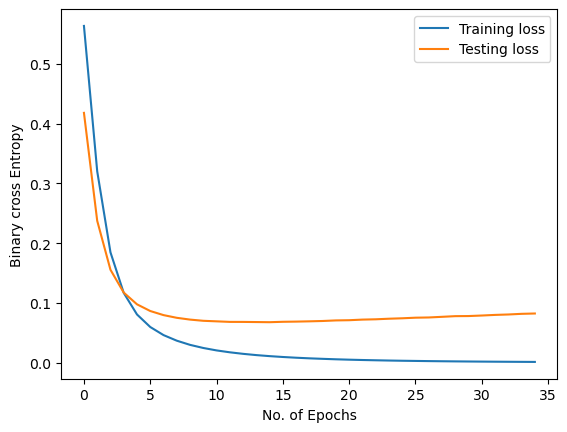

In [54]:
plt.plot(trained_model1.history['loss'],label='Training loss')
plt.plot(trained_model1.history['val_loss'],label='Testing loss')
plt.xlabel("No. of Epochs")
plt.ylabel('Binary cross Entropy')
plt.legend()
plt.show()

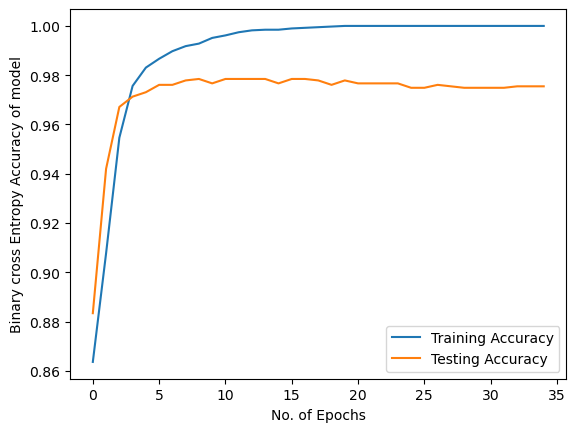

In [56]:
#visulisation of training and testing accuracy
plt.plot(trained_model1.history['accuracy'],label='Training Accuracy')
plt.plot(trained_model1.history['val_accuracy'],label='Testing Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel('Binary cross Entropy Accuracy of model')
plt.legend()
plt.show()

In [61]:
y_pred1=model1.predict(x_test_tf).round(1)
y_pred1

53/53 [==============================] - 0s 3ms/step


array([[0. ],
       [0. ],
       [0. ],
       ...,
       [0.6],
       [0. ],
       [0. ]], dtype=float32)

In [65]:
y_pred1=np.where(y_pred1>=0.5,1,0)
y_pred1

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [66]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1454
           1       0.97      0.88      0.92       218

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [67]:
print(confusion_matrix(y_test,y_pred1))

[[1449    5]
 [  27  191]]
